# Relationship between number of Hospitals near by a city and their deaths rate from Covid-19

### Introduction:

The greatest challenge facing humanity today is Covid-19

Discovered in late 2019 in Wuhan, China, this disease caused by Sars-Cov-2 has spread rapidly to virtually every country in the world, causing thousands of deaths and suffering directly or indirectly, affecting the global economy and social dynamics.

A race has started to develop an effective vaccine to halt the advancement of Covid-19, but while it is not available, adequate hospital treatment can still save many lives.

In this study, I intend to look for relationships between the number of hospitals located near a given city and the death rate due to Covid-19 in this location.

For this I will use the case and death data from each city in the US

### DataSets: 

For this project it will be used the  COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University avaliable on this page "https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series"

### Metodology:

### Part 1 :  Downloading and Preprocessing dataset with pandas

In [1]:
## Importing libraries

In [2]:
import pandas as pd

In [3]:
## Downloading Dataset from Covid-19 Deaths in US

In [4]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv

--2020-11-22 13:07:17--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2676422 (2.6M) [text/plain]
Saving to: ‘time_series_covid19_deaths_US.csv.3’

time_series_covid19 100%[===================>]   2.55M  --.-KB/s    in 0.03s   

2020-11-22 13:07:17 (77.2 MB/s) - ‘time_series_covid19_deaths_US.csv.3’ saved [2676422/2676422]



In [5]:
df_deaths = pd.read_csv('time_series_covid19_deaths_US.csv')
df_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,32,36,36,36,36,37,37,39,39,39
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,84,84,84,84,84,84,84,84,84,84
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,9,9,9,9,9,9,10,10,10,10
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,17,17,17,17,17,17,18,18,18,17
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,34,34,34,34,34,34,35,35,35,36


In [6]:
df_deaths.shape

(3340, 317)

In [7]:
df_deaths.rename(columns={'11/20/20':'Total_Deaths'}, inplace = True)
df_deaths.rename(columns = {'Admin2':'City'}, inplace = True)

In [8]:
df_deaths_simple = df_deaths[['City', 'Province_State', 'Lat', 'Long_', 'Total_Deaths' ]]
df_deaths_simple.head()

,City,Province_State,Lat,Long_,Total_Deaths
0,Autauga,Alabama,32.539527,-86.644082,39
1,Baldwin,Alabama,30.727750,-87.722071,84
2,Barbour,Alabama,31.868263,-85.387129,10
3,Bibb,Alabama,32.996421,-87.125115,18
4,Blount,Alabama,33.982109,-86.567906,35


In [9]:
print('Total Covid-19 Deaths in US at 20th November, 2020 was:', df_deaths_simple['Total_Deaths'].sum())

Total Covid-19 Deaths in US at 20th November, 2020 was: 254413


In [10]:
## Downloading Dataset from Covid-19 Cases in US

In [11]:
!wget https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv

--2020-11-22 13:07:18--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 199.232.8.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|199.232.8.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3599201 (3.4M) [text/plain]
Saving to: ‘time_series_covid19_confirmed_US.csv.3’

time_series_covid19 100%[===================>]   3.43M  --.-KB/s    in 0.05s   

2020-11-22 13:07:18 (66.6 MB/s) - ‘time_series_covid19_confirmed_US.csv.3’ saved [3599201/3599201]



In [12]:
df_cases = pd.read_csv('time_series_covid19_confirmed_US.csv')
df_cases.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,966,973,978,986,993,1004,1008,1011,1024,1036
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735


In [13]:
df_cases.shape

(3340, 316)

In [14]:
df_cases.rename(columns = {'Admin2':'City','11/20/20':'Total_Cases'}, inplace = True)
df_cases.head()

,UID,iso2,iso3,code3,FIPS,City,Province_State,Country_Region,Lat,Long_,...,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,Total_Cases,11/21/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,2385,2417,2435,2456,2481,2506,2529,2554,2580,2597
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,7454,7523,7596,7646,7696,7772,7849,7933,8038,8131
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,1113,1117,1123,1128,1130,1134,1137,1145,1151,1157
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,966,973,978,986,993,1004,1008,1011,1024,1036
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,2429,2488,2518,2549,2574,2594,2648,2683,2704,2735


In [15]:
df_cases_simple = df_cases[['City','Province_State','Lat','Long_', 'Total_Cases' ]]
df_cases_simple.head()

,City,Province_State,Lat,Long_,Total_Cases
0,Autauga,Alabama,32.539527,-86.644082,2580
1,Baldwin,Alabama,30.727750,-87.722071,8038
2,Barbour,Alabama,31.868263,-85.387129,1151
3,Bibb,Alabama,32.996421,-87.125115,1024
4,Blount,Alabama,33.982109,-86.567906,2704


In [16]:
print('Total Covid-19 Cases in US at 20 th November, 2020 was:', df_cases_simple['Total_Cases'].sum())

Total Covid-19 Cases in US at 20 th November, 2020 was: 11910858


In [17]:
## Merging the datasets

In [18]:
df_rate = pd.merge(df_deaths_simple, df_cases_simple)
df_rate.head()

,City,Province_State,Lat,Long_,Total_Deaths,Total_Cases
0,Autauga,Alabama,32.539527,-86.644082,39,2580
1,Baldwin,Alabama,30.727750,-87.722071,84,8038
2,Barbour,Alabama,31.868263,-85.387129,10,1151
3,Bibb,Alabama,32.996421,-87.125115,18,1024
4,Blount,Alabama,33.982109,-86.567906,35,2704


In [19]:
## Finding Death Rate for each city

In [20]:
df_rate['death_ratio']= df_rate['Total_Deaths']/df_rate['Total_Cases']*100
df_rate.head()

,City,Province_State,Lat,Long_,Total_Deaths,Total_Cases,death_ratio
0,Autauga,Alabama,32.539527,-86.644082,39,2580,1.511628
1,Baldwin,Alabama,30.727750,-87.722071,84,8038,1.045036
2,Barbour,Alabama,31.868263,-85.387129,10,1151,0.868810
3,Bibb,Alabama,32.996421,-87.125115,18,1024,1.757812
4,Blount,Alabama,33.982109,-86.567906,35,2704,1.294379


In [21]:
df_rate.shape

(3034, 7)

In [22]:
## Ignoring Cells without coordinates information

In [23]:
Change = df_rate['Lat'] != 0.0
df_rate_ok = df_rate[Change]
df_rate_ok.shape

(2926, 7)

In [24]:
## Selecting 100 cities with largest number of deaths

In [25]:
df_rate_ok = df_rate_ok.sort_values('Total_Deaths', ascending = False)
df_rate_100 = df_rate_ok.head(100)
df_rate_100

,City,Province_State,Lat,Long_,Total_Deaths,Total_Cases,death_ratio
1781,Queens,New York,40.710881,-73.816847,7335,84843,8.645380
576,Cook,Illinois,41.841448,-87.816588,6201,272733,2.273652
1744,Bronx,New York,40.852093,-73.862828,5029,60233,8.349244
328,Miami-Dade,Florida,25.611236,-80.551706,3746,211257,1.773196
1770,New York,New York,40.767273,-73.971526,3218,41620,7.731860
...,...,...,...,...,...,...,...
1071,Caddo,Louisiana,32.579916,-93.883757,434,12329,3.520156
605,Kane,Illinois,41.938427,-88.428614,431,28225,1.527015
1863,Mecklenburg,North Carolina,35.244693,-80.831767,427,39880,1.070712
221,Arapahoe,Colorado,39.649775,-104.335362,426,22728,1.874340


## Part 2: Bringin the Geospatial Localization Information

In [26]:
## Importin another necessary libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [28]:
## Foursquare Acess

In [29]:
CLIENT_ID = 'FYXMXLXZLZUIBCMGCLCW1OYG4BCBNWMNZGQOADNWNOU43OVH' # My Foursquare ID
CLIENT_SECRET = 'SVHXAGV43TH5MCRMJMMCTFW55R1GQXBQM2IW52BFO1SSF1R1' # My Foursquare Secret
VERSION = '20201120' # Foursquare API version - Date when it have been used
LIMIT = 100 

print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: FYXMXLXZLZUIBCMGCLCW1OYG4BCBNWMNZGQOADNWNOU43OVH
CLIENT_SECRET:SVHXAGV43TH5MCRMJMMCTFW55R1GQXBQM2IW52BFO1SSF1R1


In [30]:
LIMIT = 100
radius = 6000

In [31]:
def getNearbyHospitals(names, latitudes, longitudes, radius=6000):
    
    venues_list=[]
    for City, Lat, Long_ in zip(names, latitudes, longitudes):
        print(City)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&query=hospital&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            Lat, 
            Long_, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            City, 
            Lat, 
            Long_, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
US_venues = getNearbyHospitals(names=df_rate_100['City'],
                            latitudes=df_rate_100['Lat'],
                            longitudes=df_rate_100['Long_'])

Queens
Cook
Bronx
Miami-Dade
New York
Wayne
Harris
Middlesex
Nassau
Essex
Bergen
Suffolk
Hidalgo
Philadelphia
Clark
Palm Beach
Broward
Hudson
Hartford
Orange
Westchester
Middlesex
Fairfield
Bexar
Union
Essex
Riverside
Oakland
Passaic
Worcester
Macomb
Norfolk
San Bernardino
Richmond
Cameron
Ocean
Hennepin
Providence
Tarrant
St. Louis
Montgomery
Montgomery
Prince George's
Hillsborough
Monmouth
Plymouth
Hampden
Pinellas
Morris
King
Marion
Bristol
Delaware
Erie
DuPage
Cuyahoga
Baltimore
Milwaukee
Rockland
Fulton
Pima
District of Columbia
Franklin
Camden
Polk
Bucks
Mercer
Orleans
Shelby
Jefferson
Orange
Fairfax
Somerset
Lake
Duval
Lee
Baltimore City
Burlington
Will
Orange
Gwinnett
Lancaster
San Joaquin
Cobb
Alameda
East Baton Rouge
Jefferson
Fresno
Nueces
Allegheny
Santa Clara
Ramsey
Berks
DeKalb
Lake
Caddo
Kane
Mecklenburg
Arapahoe
Jefferson


In [33]:
US_venues.head()

,City,City Latitude,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Queens,40.710881,-73.816847,Jamaica Hospital Medical Center,40.700428,-73.816430,Hospital
1,Queens,40.710881,-73.816847,Queens Hospital Center,40.717176,-73.804135,Hospital
2,Queens,40.710881,-73.816847,NewYork-Presbyterian Queens,40.747248,-73.825336,Hospital
3,Queens,40.710881,-73.816847,Long Island Jewish Forest Hills Hospital,40.729062,-73.851625,Hospital
4,Queens,40.710881,-73.816847,Jamaica Hospital Occupational Health Office,40.702470,-73.817748,Hospital


In [34]:
US_venues.shape

(3086, 7)

In [35]:
df_hospitals = US_venues.groupby('City Latitude').count()

In [36]:
df_hospitals

,City,City Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
City Latitude,,,,,,
26.584103,23,23,23,23,23,23
27.927656,51,51,51,51,51,51
27.931303,14,14,14,14,14,14
27.950271,1,1,1,1,1,1
28.513676,67,67,67,67,67,67
...,...,...,...,...,...,...
42.762490,4,4,4,4,4,4
43.004861,100,100,100,100,100,100
45.007615,5,5,5,5,5,5


In [37]:
df_hospitals1 = df_hospitals[['Venue']]
df_hospitals1.shape

(81, 1)

In [38]:
df_hospitals1

,Venue
City Latitude,
26.584103,23
27.927656,51
27.931303,14
27.950271,1
28.513676,67
...,...
42.762490,4
43.004861,100
45.007615,5


In [39]:
df_hospitals1.rename(columns={'Venue':'Number_of_Near_Hospitals'}, inplace = True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
df_rate_100.shape

(100, 7)

In [41]:
### Merging dataframes to bring Number of Hospitals information for the main dataframe

In [42]:
df_rate_100_final = pd.merge(df_rate_100, df_hospitals1, left_on = 'Lat', right_on = 'City Latitude', how ='outer')
df_rate_100_final

,City,Province_State,Lat,Long_,Total_Deaths,Total_Cases,death_ratio,Number_of_Near_Hospitals
0,Queens,New York,40.710881,-73.816847,7335,84843,8.645380,100.0
1,Cook,Illinois,41.841448,-87.816588,6201,272733,2.273652,55.0
2,Bronx,New York,40.852093,-73.862828,5029,60233,8.349244,100.0
3,Miami-Dade,Florida,25.611236,-80.551706,3746,211257,1.773196,NaN
4,New York,New York,40.767273,-73.971526,3218,41620,7.731860,100.0
...,...,...,...,...,...,...,...,...
95,Caddo,Louisiana,32.579916,-93.883757,434,12329,3.520156,NaN
96,Kane,Illinois,41.938427,-88.428614,431,28225,1.527015,NaN
97,Mecklenburg,North Carolina,35.244693,-80.831767,427,39880,1.070712,79.0
98,Arapahoe,Colorado,39.649775,-104.335362,426,22728,1.874340,NaN


In [43]:
## Cheangeing NaN values to Zero

In [44]:
df_rate_100_final.fillna(0)

,City,Province_State,Lat,Long_,Total_Deaths,Total_Cases,death_ratio,Number_of_Near_Hospitals
0,Queens,New York,40.710881,-73.816847,7335,84843,8.645380,100.0
1,Cook,Illinois,41.841448,-87.816588,6201,272733,2.273652,55.0
2,Bronx,New York,40.852093,-73.862828,5029,60233,8.349244,100.0
3,Miami-Dade,Florida,25.611236,-80.551706,3746,211257,1.773196,0.0
4,New York,New York,40.767273,-73.971526,3218,41620,7.731860,100.0
...,...,...,...,...,...,...,...,...
95,Caddo,Louisiana,32.579916,-93.883757,434,12329,3.520156,0.0
96,Kane,Illinois,41.938427,-88.428614,431,28225,1.527015,0.0
97,Mecklenburg,North Carolina,35.244693,-80.831767,427,39880,1.070712,79.0
98,Arapahoe,Colorado,39.649775,-104.335362,426,22728,1.874340,0.0


In [45]:
df_rate_100.shape

(100, 7)

## Part 3 -  Finding correlation between Number of Near Hospitals and Death Ratio

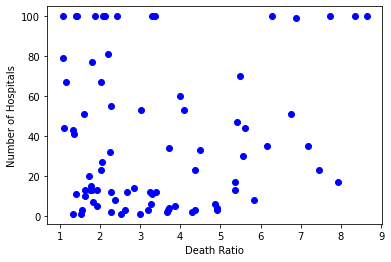

In [46]:
plt.scatter(df_rate_100_final.death_ratio, df_rate_100_final.Number_of_Near_Hospitals , color = 'blue')
plt.xlabel('Death Ratio')
plt.ylabel('Number of Hospitals')
plt.show()

### Results and Discussion:

Covid-19 is still a disease that we are not fully aware of.

So far, it is known that personal hygiene with constant hand washing and use of alcohol gel, in addition to social distance and the use of masks are the best ways to prevent it.

For patients with the most severe cases of the disease, however, it is known that in a significant portion of the time, hospital care is required in an ICU with intubation. Thus, it is imagined that in cities with a greater number of hospitals and available hospital beds, the mortality rate due to Covid-19 was lower than in places with fewer beds.

But the analysis of the data in this study does not make this clear.

Obviously, Covid-19 and its mortality rate are multifactorial, involving social, economic, cultural and behavioral aspects of each location in the world.

### Conclusion:

At first, there is apparently no direct correlation between the number of hospitals near a city and its death rate from Covid-19